In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
df=pd.read_csv('WHR2023.csv')
df.head()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
df.style.apply(highlight_max)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804000,0.036000,7.875000,7.733000,10.792000,0.969000,71.150000,0.961000,-0.019000,0.182000,1.778000,1.888000,1.585000,0.535000,0.772000,0.126000,0.535000,2.363000
1,Denmark,7.586000,0.041000,7.667000,7.506000,10.962000,0.954000,71.250000,0.934000,0.134000,0.196000,1.778000,1.949000,1.548000,0.537000,0.734000,0.208000,0.525000,2.084000
2,Iceland,7.530000,0.049000,7.625000,7.434000,10.896000,0.983000,72.050000,0.936000,0.211000,0.668000,1.778000,1.926000,1.620000,0.559000,0.738000,0.250000,0.187000,2.250000
3,Israel,7.473000,0.032000,7.535000,7.411000,10.639000,0.943000,72.697000,0.809000,-0.023000,0.708000,1.778000,1.833000,1.521000,0.577000,0.569000,0.124000,0.158000,2.691000
4,Netherlands,7.403000,0.029000,7.460000,7.346000,10.942000,0.930000,71.550000,0.887000,0.213000,0.379000,1.778000,1.942000,1.488000,0.545000,0.672000,0.251000,0.394000,2.110000
5,Sweden,7.395000,0.037000,7.468000,7.322000,10.883000,0.939000,72.150000,0.948000,0.165000,0.202000,1.778000,1.921000,1.510000,0.562000,0.754000,0.225000,0.520000,1.903000
6,Norway,7.315000,0.044000,7.402000,7.229000,11.088000,0.943000,71.500000,0.947000,0.141000,0.283000,1.778000,1.994000,1.521000,0.544000,0.752000,0.212000,0.463000,1.829000
7,Switzerland,7.240000,0.043000,7.324000,7.156000,11.164000,0.920000,72.900000,0.891000,0.027000,0.266000,1.778000,2.022000,1.463000,0.582000,0.678000,0.151000,0.475000,1.870000
8,Luxembourg,7.228000,0.069000,7.363000,7.093000,11.660000,0.879000,71.675000,0.915000,0.024000,0.345000,1.778000,2.200000,1.357000,0.549000,0.710000,0.149000,0.418000,1.845000
9,New Zealand,7.123000,0.038000,7.198000,7.048000,10.662000,0.952000,70.350000,0.887000,0.175000,0.271000,1.778000,1.842000,1.544000,0.513000,0.672000,0.230000,0.471000,1.852000


In [156]:
df.shape


(137, 19)

In [157]:
import scipy
from scipy import stats

x = scipy.stats.pearsonr(df['Ladder score'],  df['Social support'])
x

PearsonRResult(statistic=0.8345316508727761, pvalue=9.21222839922083e-37)

In [158]:
import statsmodels.formula.api as smf
import pandas as pd
from geopy.geocoders import Nominatim

# Create a sample dataframe with a column containing strings
data = {'Location': ['New York, USA', 'London, UK', 'Paris, France', 'Berlin, Germany', 'Tokyo, Japan']}
ex_df = pd.DataFrame(data)

# Create a geolocator object using Nominatim
geolocator = Nominatim(user_agent="my_app")

# Define a function to get the latitude and longitude coordinates of a location
def get_coordinates(location):
    try:
        # Use the geolocator object to get the latitude and longitude coordinates
        location = geolocator.geocode(location)
        return location.latitude, location.longitude
    except:
        # Return None if the location could not be geocoded
        return None, None

# Apply the get_coordinates function to the Location column and create new columns for latitude and longitude
ex_df[['Latitude', 'Longitude']] = ex_df['Location'].apply(lambda x: pd.Series(get_coordinates(x)))

# Print the resulting dataframe
print(ex_df)

          Location   Latitude   Longitude
0    New York, USA  40.712728  -74.006015
1       London, UK  51.507336   -0.127650
2    Paris, France  48.853495    2.348391
3  Berlin, Germany  52.517037   13.388860
4     Tokyo, Japan  35.681266  139.757653


In [159]:
df = pd.DataFrame(df)

# Create a geolocator object using Nominatim
geolocator = Nominatim(user_agent="my_app")

# Define a function to get the latitude and longitude coordinates of a location
def get_coordinates(location):
    try:
        # Use the geolocator object to get the latitude and longitude coordinates
        location = geolocator.geocode(location)
        return location.latitude, location.longitude
    except:
        # Return None if the location could not be geocoded
        return None, None

# Apply the get_coordinates function to the Location column and create new columns for latitude and longitude
df[['Latitude', 'Longitude']] = df['Country name'].apply(lambda x: pd.Series(get_coordinates(x)))

# Print the resulting dataframe
df.head(10)

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Latitude,Longitude
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,...,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,63.246778,25.920916
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,...,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,55.670249,10.333328
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,...,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,64.984182,-18.105901
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,...,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,30.812425,34.859476
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,...,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,52.243498,5.634323
5,Sweden,7.395,0.037,7.468,7.322,10.883,0.939,72.150,0.948,0.165,...,1.778,1.921,1.510,0.562,0.754,0.225,0.520,1.903,59.674971,14.520858
6,Norway,7.315,0.044,7.402,7.229,11.088,0.943,71.500,0.947,0.141,...,1.778,1.994,1.521,0.544,0.752,0.212,0.463,1.829,61.152939,8.787665
7,Switzerland,7.240,0.043,7.324,7.156,11.164,0.920,72.900,0.891,0.027,...,1.778,2.022,1.463,0.582,0.678,0.151,0.475,1.870,46.798562,8.231974
8,Luxembourg,7.228,0.069,7.363,7.093,11.660,0.879,71.675,0.915,0.024,...,1.778,2.200,1.357,0.549,0.710,0.149,0.418,1.845,49.815868,6.129675
9,New Zealand,7.123,0.038,7.198,7.048,10.662,0.952,70.350,0.887,0.175,...,1.778,1.842,1.544,0.513,0.672,0.230,0.471,1.852,-41.500083,172.834408


In [160]:
import plotly.express as px
fig = px.scatter_mapbox(df, lat = 'Latitude', lon = 'Longitude', size = 'Ladder score', 
custom_data = ['Country name', 'Social support', 'Healthy life expectancy', 'Logged GDP per capita', 'Perceptions of corruption'], 
                        color= 'Ladder score', color_discrete_sequence = ["aquamarine"], zoom = 0)
fig.update_layout(title= 'Map', title_x = .1, title_y = .9, height = 800, margin = {"r":0, "t":0, "l":0, "b":0}, mapbox_style = "open-street-map")
fig.update_traces(hovertemplate = "<br>".join(["Country Name:  %{customdata[0]}", 
                                               "Social Support:  %{customdata[1]}", 
                                               "Healthy Life Expectancy:  %{customdata[2]}", 
                                                "Log GDP Per Capita:  %{customdata[3]}",
                                               "Perceptions of corruption:  %{customdata[4]}",
                                              ]))
fig.show()

In [161]:
data = df

In [162]:
data.head()

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Latitude,Longitude
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,...,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363,63.246778,25.920916
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,...,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084,55.670249,10.333328
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,...,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250,64.984182,-18.105901
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,...,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691,30.812425,34.859476
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,...,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110,52.243498,5.634323


In [163]:
data.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Latitude,Longitude
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,137.000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000,135.000000,135.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838,22.539144,18.058133
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,0.000,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390,25.177203,56.303028
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000,-41.500083,-107.991707
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250,7.995804,-4.057277
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500,25.624262,19.506094
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750,42.622912,43.263905
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000,64.984182,172.834408


In [164]:
data.shape

(137, 21)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [166]:
data.dtypes

Country name                                   object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

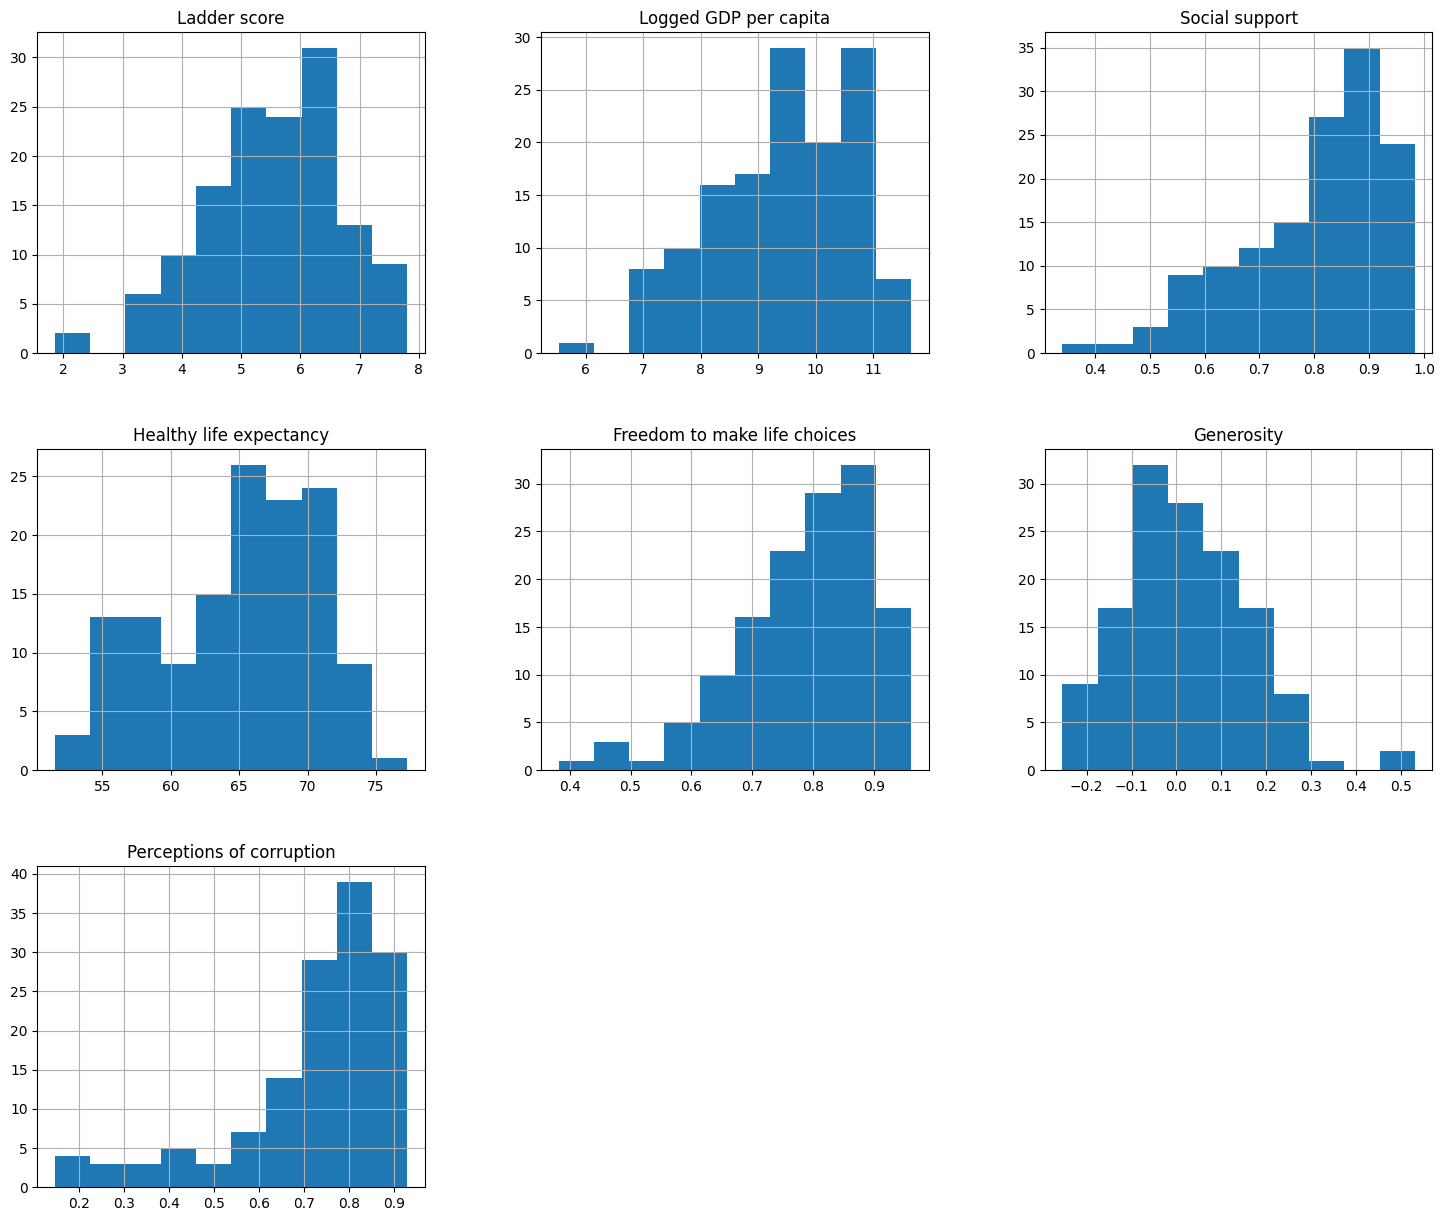

In [248]:
# univariate analysis visualizations

#histogram
import matplotlib.pyplot as plt

data2 = data[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

data2.hist(figsize=(18,15))
plt.show()


In [249]:
data.columns

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Latitude', 'Longitude'],
      dtype='object')

In [250]:

data.columns.value_counts()

Country name                                  1
Ladder score in Dystopia                      1
Latitude                                      1
Dystopia + residual                           1
Explained by: Perceptions of corruption       1
Explained by: Generosity                      1
Explained by: Freedom to make life choices    1
Explained by: Healthy life expectancy         1
Explained by: Social support                  1
Explained by: Log GDP per capita              1
Perceptions of corruption                     1
Ladder score                                  1
Generosity                                    1
Freedom to make life choices                  1
Healthy life expectancy                       1
Social support                                1
Logged GDP per capita                         1
lowerwhisker                                  1
upperwhisker                                  1
Standard error of ladder score                1
Longitude                               

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba2bcd60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba2bd2a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba2bcac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba2bd7e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba2bda80>],
 'means': []}

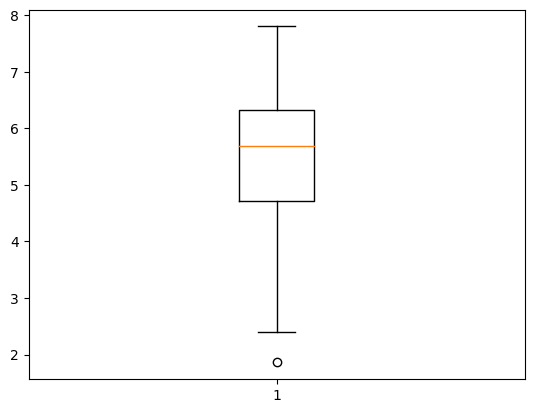

In [251]:
# ['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
# box plot
plt.boxplot(data['Ladder score'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba2f0100>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba2f0640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba2d7e20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba2f0b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba2f0e20>],
 'means': []}

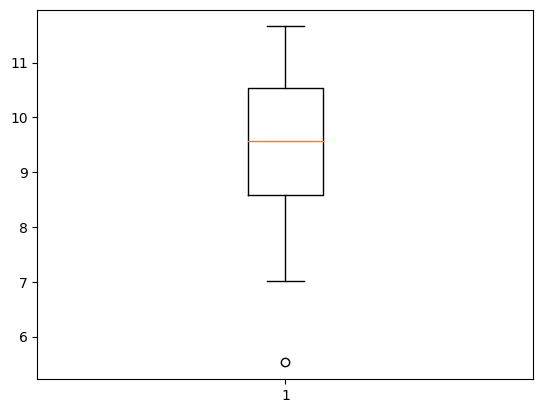

In [252]:
plt.boxplot(data['Logged GDP per capita'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba327010>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba327430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba326d70>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba327970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba327c10>],
 'means': []}

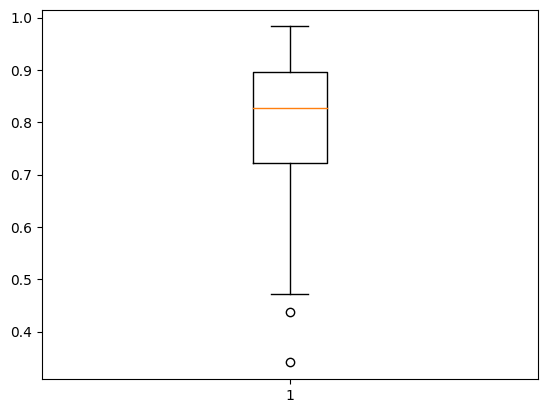

In [253]:
plt.boxplot(data['Social support'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba196590>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba196ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba1962f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba1969e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba196bf0>],
 'means': []}

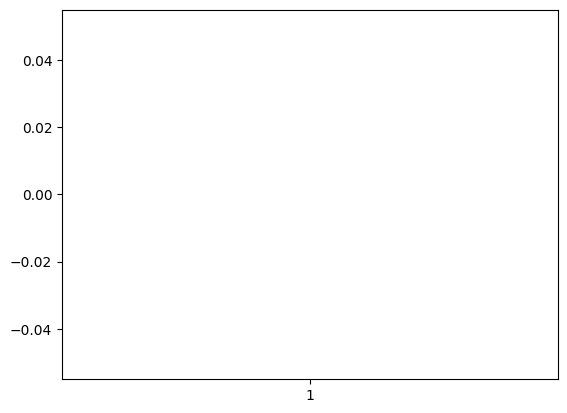

In [254]:
plt.boxplot(data['Healthy life expectancy'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba2142b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba2147f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba1e3fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba214d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba214fd0>],
 'means': []}

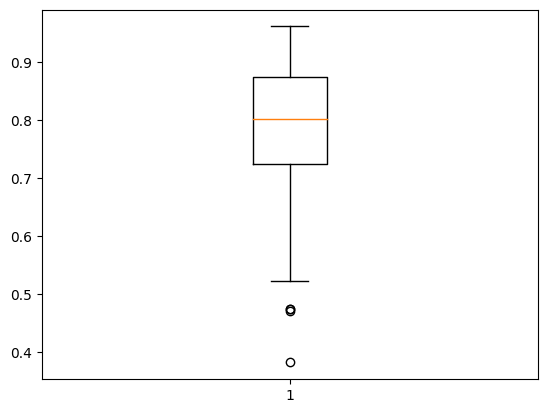

In [255]:
plt.boxplot(data['Freedom to make life choices'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba062f20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba063460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba062c80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba0639a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba1e2080>],
 'means': []}

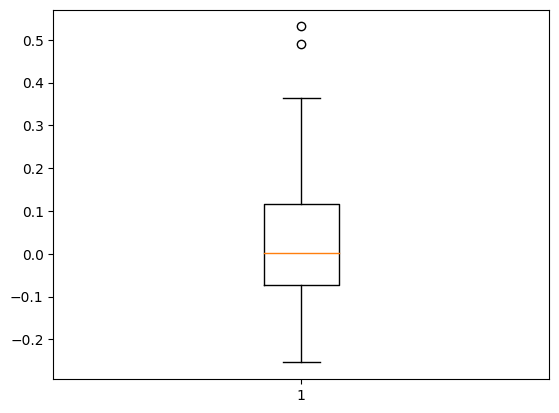

In [256]:
plt.boxplot(data['Generosity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8cba0daa70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8cba0dafb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8cba0da7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cba0db4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cba0db790>],
 'means': []}

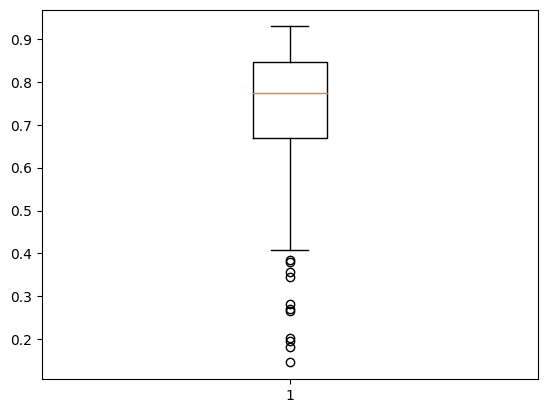

In [257]:
plt.boxplot(data['Perceptions of corruption'])

In [258]:
Ladder_score_count = data['Ladder score'].value_counts()
Ladder_score_count

6.144    2
6.125    2
5.277    2
7.804    1
5.071    1
        ..
6.260    1
6.265    1
6.300    1
6.330    1
1.859    1
Name: Ladder score, Length: 134, dtype: int64

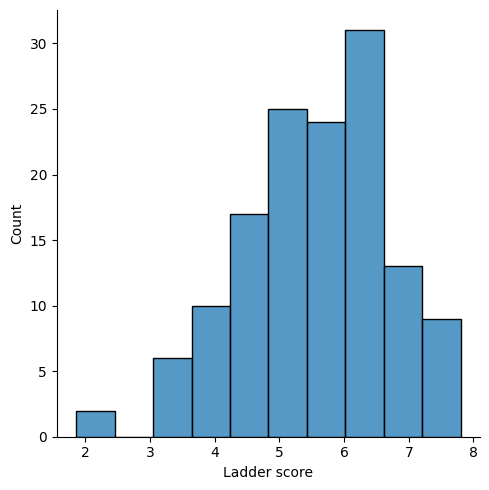

In [259]:
# distribution plot
sns.displot(data['Ladder score'])

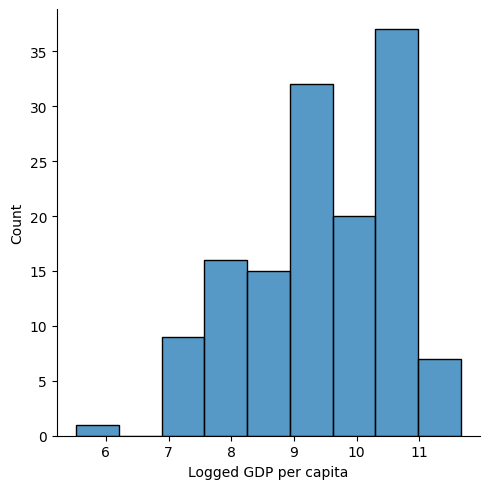

In [260]:
sns.displot(data['Logged GDP per capita'])

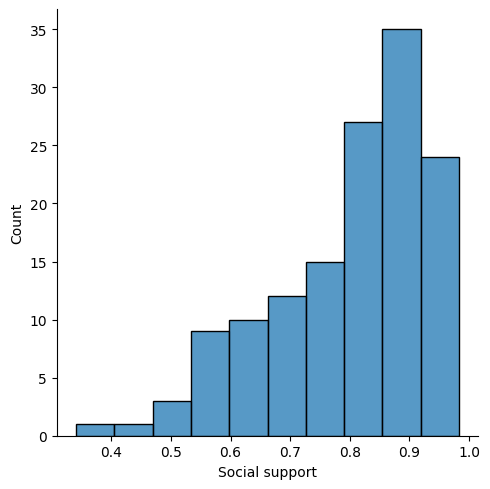

In [261]:
sns.displot(data['Social support'])

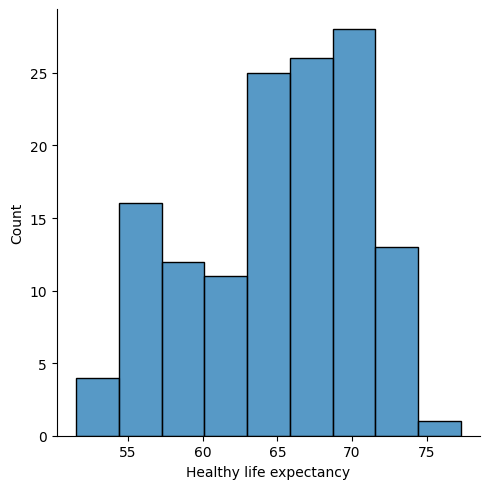

In [262]:
sns.displot(data['Healthy life expectancy'])

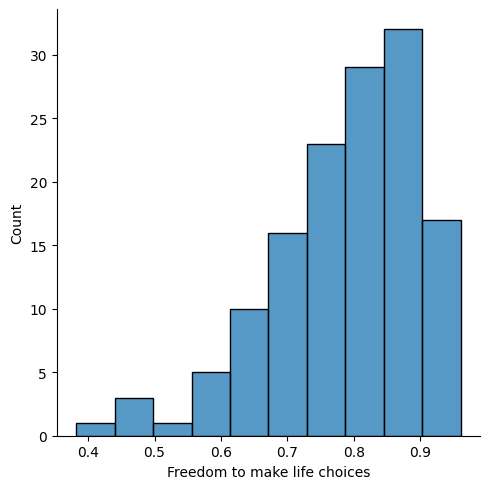

In [263]:
sns.displot(data['Freedom to make life choices'])

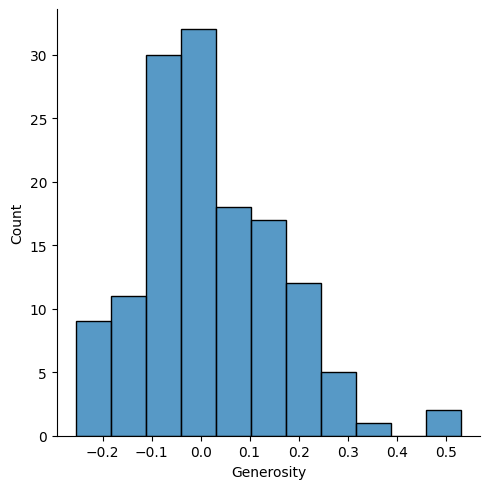

In [264]:
sns.displot(data['Generosity'])

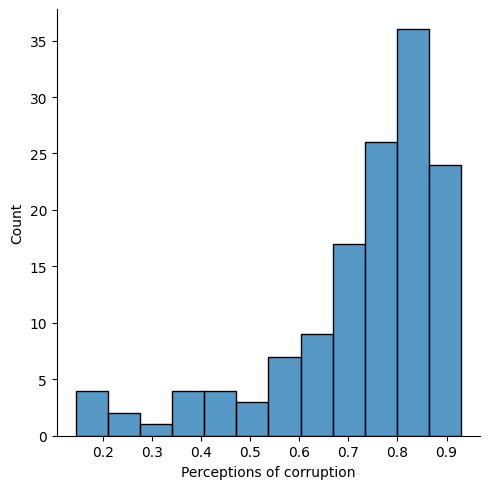

In [265]:
sns.displot(data['Perceptions of corruption'])

Text(0, 0.5, 'Ladder score')

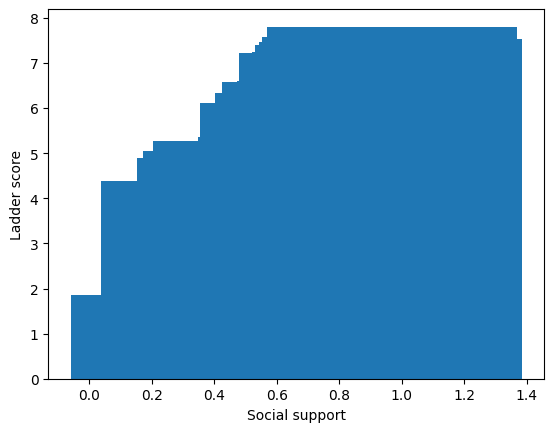

In [266]:
# bivariate analysis visualizations
# bar plot
plt.bar(data['Social support'],data['Ladder score'])
plt.xlabel('Social support')
plt.ylabel('Ladder score')


Text(0, 0.5, 'Ladder score')

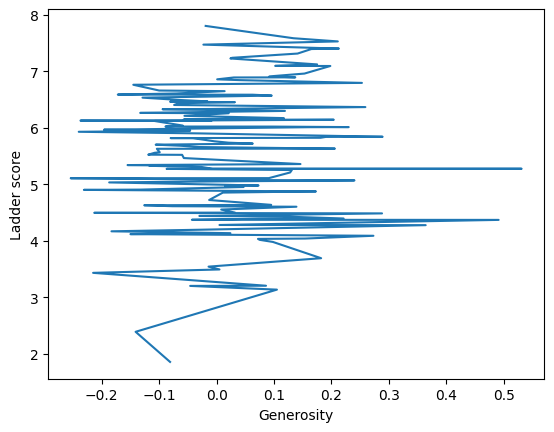

In [267]:
# line plot
plt.plot(data['Generosity'],data['Ladder score'])
plt.xlabel('Generosity')
plt.ylabel('Ladder score')

Text(0, 0.5, 'Ladder score')

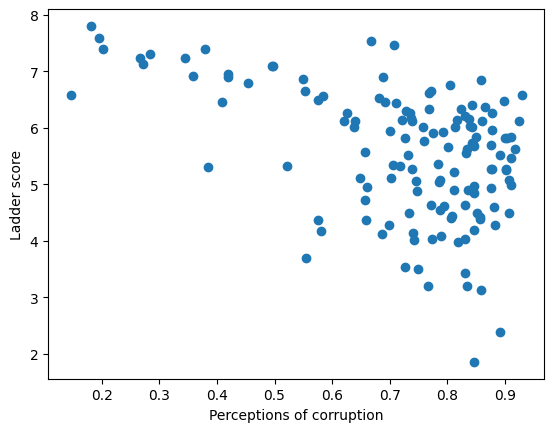

In [268]:
# scatter plot
plt.scatter(data['Perceptions of corruption'],data['Ladder score'])
plt.xlabel('Perceptions of corruption')
plt.ylabel('Ladder score')

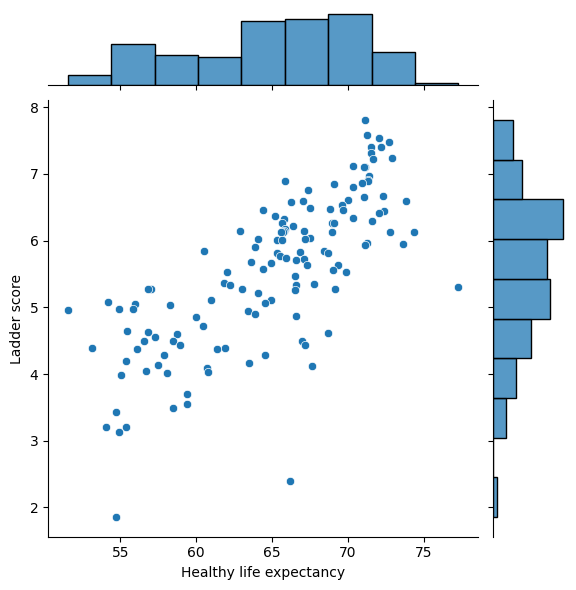

In [269]:
# 4.joint plot
# Create joint plot
sns.jointplot(x=data['Healthy life expectancy'],y=data['Ladder score'])

# Display the plot
plt.show()

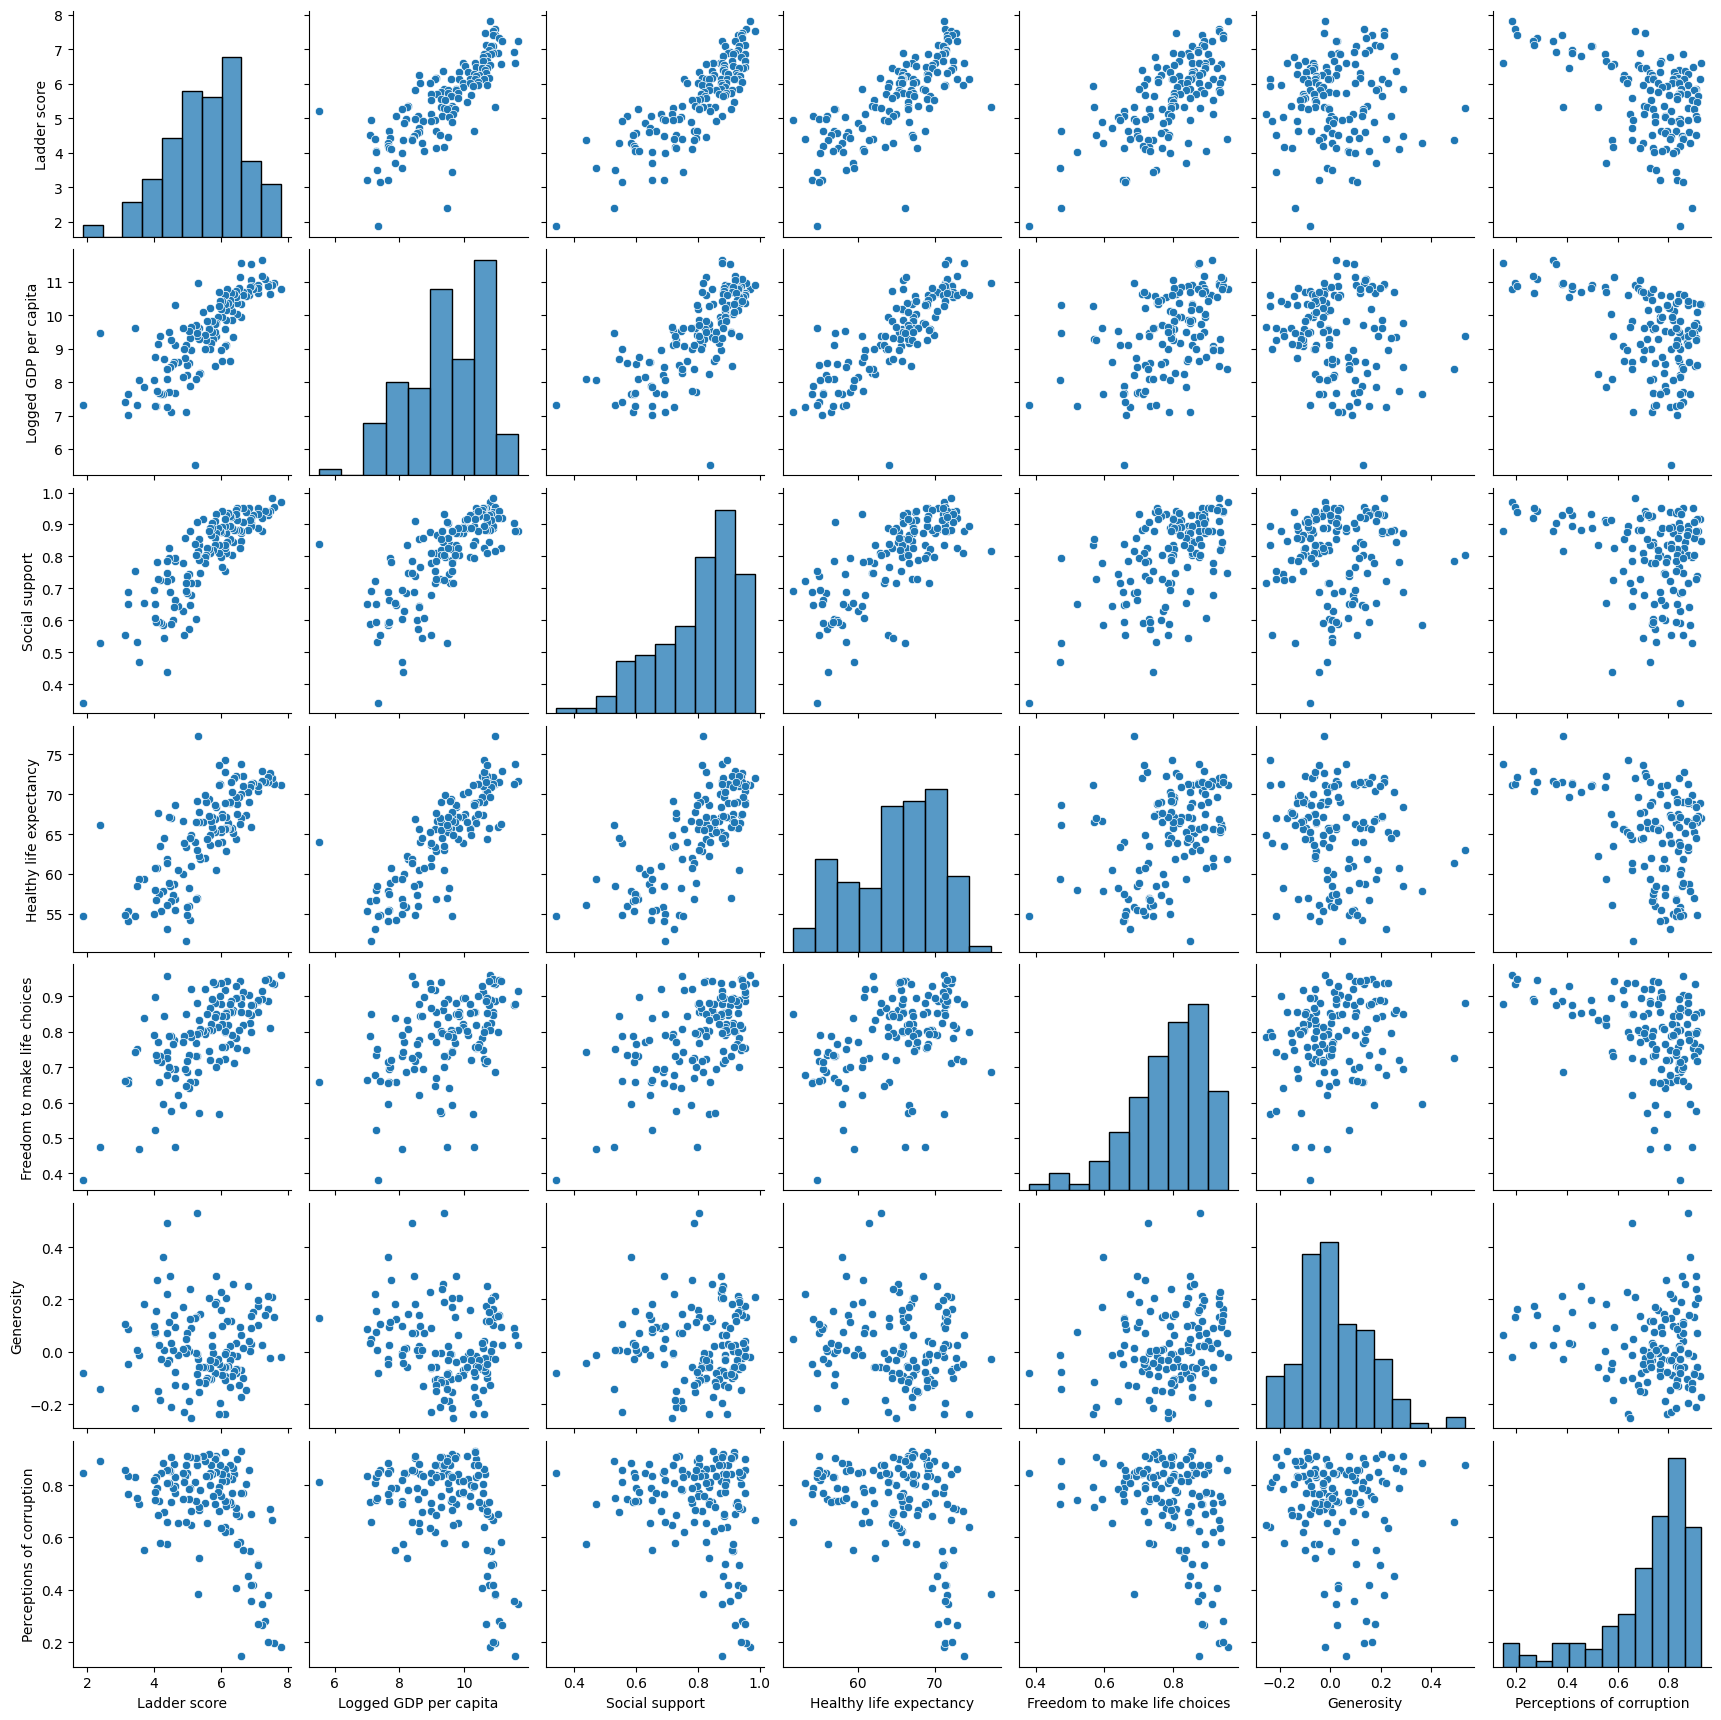

In [270]:
# multivariate analysis visualizations
# pair plot (scatter matrix)
sns.pairplot(data2)

In [271]:
#heatmap with correlation matrix

# correlation matrix
hm = data2.corr()
hm

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.784367,0.834532,0.746928,0.662924,0.044082,-0.471911
Logged GDP per capita,0.784367,1.000000,0.738069,0.837533,0.451439,-0.156456,-0.436961
Social support,0.834532,0.738069,1.000000,0.725524,0.541630,0.036574,-0.272490
Healthy life expectancy,0.746928,0.837533,0.725524,1.000000,0.415092,-0.135036,-0.404396
Freedom to make life choices,0.662924,0.451439,0.541630,0.415092,1.000000,0.170229,-0.383786
Generosity,0.044082,-0.156456,0.036574,-0.135036,0.170229,1.000000,-0.122653
Perceptions of corruption,-0.471911,-0.436961,-0.272490,-0.404396,-0.383786,-0.122653,1.000000


Axes(0.125,0.11;0.62x0.77)


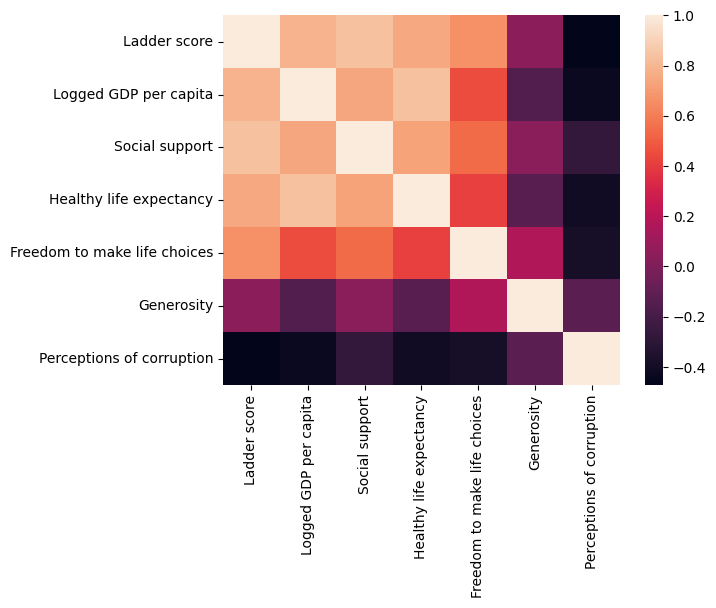

In [272]:
# heatmap
heatmap = sns.heatmap(hm)
print(heatmap)

<Axes: >

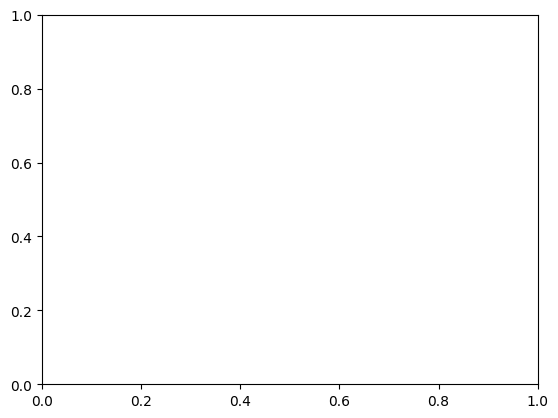

In [273]:
# subplot
plt.subplot()

Text(0, 0.5, 'Ladder score')

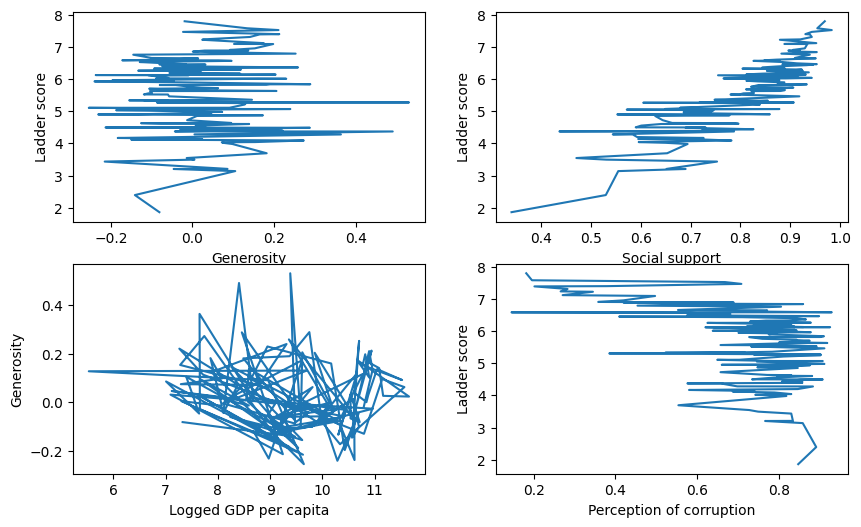

In [274]:
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.plot(data['Generosity'],data['Ladder score'])
plt.xlabel('Generosity')
plt.ylabel('Ladder score')

plt.subplot(2,2,2)
plt.plot(data['Social support'],data['Ladder score'])
plt.xlabel('Social support')
plt.ylabel('Ladder score')

plt.subplot(2,2,3)
plt.plot(data['Logged GDP per capita'],data['Generosity'])
plt.xlabel('Logged GDP per capita')
plt.ylabel('Generosity')

plt.subplot(2,2,4)
plt.plot(data['Perceptions of corruption'],data['Ladder score'])
plt.xlabel('Perception of corruption')
plt.ylabel('Ladder score')

In [680]:
data2 = data[['Ladder score','Logged GDP per capita','Social support','Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [650]:
data2['Ladder score'].tail(10)

127    3.982
128    3.694
129    3.545
130    3.495
131    3.435
132    3.207
133    3.204
134    3.138
135    2.392
136    1.859
Name: Ladder score, dtype: float64

In [651]:
data2.shape

(137, 7)

In [525]:
# performing descriptive statistics on a dataset

# descriptive analysis
data2.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401
std,1.139929,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956
min,1.859000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000
max,7.804000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000


In [526]:
# mean
data2.mean()

Ladder score                     5.539796
Logged GDP per capita            9.449796
Social support                   0.799073
Healthy life expectancy         64.967632
Freedom to make life choices     0.787394
Generosity                       0.022431
Perceptions of corruption        0.725401
dtype: float64

In [527]:
# median
data2.median()

Ladder score                     5.6840
Logged GDP per capita            9.5670
Social support                   0.8270
Healthy life expectancy         65.8375
Freedom to make life choices     0.8010
Generosity                       0.0010
Perceptions of corruption        0.7740
dtype: float64

In [528]:
# mode
data2.mode()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5.277,9.478,0.826,71.15,0.856,-0.06,0.830
1,6.125,10.611,0.836,NaN,NaN,NaN,0.846
2,6.144,NaN,0.878,NaN,NaN,NaN,NaN
3,NaN,NaN,0.943,NaN,NaN,NaN,NaN


In [529]:
# variance
data2.var()

Ladder score                     1.299438
Logged GDP per capita            1.457579
Social support                   0.016698
Healthy life expectancy         33.066989
Freedom to make life choices     0.012627
Generosity                       0.020081
Perceptions of corruption        0.031313
dtype: float64

In [530]:
# standard deviation
data2.std()

Ladder score                    1.139929
Logged GDP per capita           1.207302
Social support                  0.129222
Healthy life expectancy         5.750390
Freedom to make life choices    0.112371
Generosity                      0.141707
Perceptions of corruption       0.176956
dtype: float64

In [531]:
# handling the missing values
data2.isna()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
132,False,False,False,False,False,False,False
133,False,False,False,False,False,False,False
134,False,False,False,False,False,False,False
135,False,False,False,False,False,False,False


In [669]:
data2.isnull().sum()

Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [682]:
data2['Healthy life expectancy'].fillna(data2['Healthy life expectancy'].mean(),inplace=True)
data2.isnull().sum()

<ipython-input-682-c20ad3431700>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [684]:
# finding outliers and replacing them 
# ladder score
perc99_lad = data2['Ladder score'].quantile(0.99)
perc99_lad

7.56584

In [686]:
outliers_lad = data2[data2['Ladder score']>perc99_lad]
outliers_lad

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.804,10.792,0.969,71.15,0.961,-0.019,0.182
1,7.586,10.962,0.954,71.25,0.934,0.134,0.196


In [688]:
for outlier in outliers_lad.index:
  data2.loc[outlier,'Ladder score']=data2['Ladder score'].mean()


<ipython-input-688-088dc7d12409>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [693]:
data2.shape

(137, 7)

In [690]:
# Generosity
perc99_gen = data2['Generosity'].quantile(0.99)
perc99_gen

0.44527999999999823

In [691]:
outliers_gen = data2[data2['Generosity']>perc99_gen]
outliers_gen

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
83,5.277,9.385,0.804,63.048,0.880,0.531,0.876
116,4.372,8.404,0.787,61.388,0.727,0.491,0.658


In [692]:
for outlier in outliers_gen.index:
  data2.loc[outlier,'Generosity']=data2['Generosity'].mean(0)

<ipython-input-692-ed5133ff2068>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [663]:
# social support
perc99_sup = data2['Social support'].quantile(0.99)
perc99_sup

0.9635999999999998

In [664]:
outliers_sup = data2[data2['Social support']>perc99_sup]
outliers_sup

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.804,10.792,0.969,71.15,0.961,-0.019,0.182
2,7.530,10.896,0.983,72.05,0.936,0.211,0.668


In [694]:
for outlier in outliers_sup.index:
  data2.loc[outlier,'Social support']=data2['Social support'].mean()

<ipython-input-694-bfaa631896af>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [698]:
data2.shape

(137, 7)

In [666]:
# healthy life expectancy
perc99_life = data2['Healthy life expectancy'].quantile(0.99)
perc99_life

74.15136

In [544]:
outliers_life = data2[data2['Healthy life expectancy']>perc99_life]
outliers_life

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
46,6.129,10.616,0.894,74.349,0.799,-0.237,0.640
81,5.308,10.966,0.817,77.280,0.687,-0.026,0.385


In [696]:
for outlier in outliers_life.index:
        data2.loc[outlier, 'Healthy life expectancy'] = data2['Healthy life expectancy'].mean()
   

<ipython-input-696-67ddd95bd85c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [546]:
# freedom to make life choices
perc99_freedom = data2['Freedom to make life choices'].quantile(0.99)
perc99_freedom 

0.9543999999999998

In [547]:
outliers_freedom = data2[data2['Freedom to make life choices']>perc99_freedom]
outliers_freedom

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.804,10.792,0.969,71.15,0.961,-0.019,0.182
114,4.393,8.385,0.747,61.90,0.958,0.073,0.857


In [697]:
for outlier in outliers_freedom.index:
  data2.loc[outlier,'Freedom to make life choices']=data2['Freedom to make life choices'].mean()

<ipython-input-697-20746d403a53>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [552]:
# perceptions of corruption

perc99_corruption = data2['Perceptions of corruption'].quantile(0.99)
perc99_corruption

0.92199

In [553]:
outliers_corruption = data2[data2['Perceptions of corruption']>perc99_freedom]
outliers_corruption

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [554]:
for outlier in outliers_corruption:
  data2.loc[outlier,'Perceptions of corruption']=data2['Perceptions of corruption'].mean()

In [555]:
# logged GDP per capita
perc99_GDP = data2['Logged GDP per capita'].quantile(0.99)
perc99_GDP

11.555159999999999

In [556]:
outliers_GDP = data2[data2['Logged GDP per capita']>perc99_GDP]
outliers_GDP

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
8,7.228,11.660,0.879,71.675,0.915,0.024,0.345
24,6.587,11.571,0.878,73.800,0.878,0.063,0.146


In [699]:
for outlier in outliers_GDP.index:
  data2.loc[outlier,'Logged GDP per capita']=data2['Logged GDP per capita'].mean()

<ipython-input-699-85ffb41230b6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [700]:
# X and y split
y = data2['Ladder score']

In [701]:
y.tail(10)

127    3.982
128    3.694
129    3.545
130    3.495
131    3.435
132    3.207
133    3.204
134    3.138
135    2.392
136    1.859
Name: Ladder score, dtype: float64

In [702]:
X = data2.drop(columns=['Ladder score'])

In [703]:
X.tail(10)

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
127,8.074,0.694,55.032,0.791,0.098,0.818
128,7.857,0.653,59.401,0.838,0.182,0.554
129,8.075,0.471,59.425,0.470,-0.014,0.727
130,7.302,0.531,58.475,0.750,0.005,0.749
131,9.629,0.753,54.725,0.742,-0.215,0.830
132,7.007,0.652,55.375,0.664,0.086,0.834
133,7.641,0.690,54.050,0.654,-0.046,0.766
134,7.394,0.555,54.900,0.660,0.105,0.858
135,9.478,0.530,66.149,0.474,-0.141,0.891
136,7.324,0.341,54.712,0.382,-0.081,0.847


In [704]:
X.shape

(137, 6)

In [705]:
# standard scaling
name = X.columns

In [706]:
name

Index(['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [707]:
from sklearn.preprocessing import StandardScaler

In [708]:
scale = StandardScaler()

In [709]:
X_scaled = scale.fit_transform(X)

In [710]:
X_scaled

array([[ 1.17066255e+00,  2.04196027e-02,  1.14242007e+00,
         2.29284431e-02, -2.67673758e-01, -3.08210123e+00],
       [ 1.31551086e+00,  1.24095735e+00,  1.16043586e+00,
         1.35591235e+00,  9.27327611e-01, -3.00269508e+00],
       [ 1.25927563e+00,  1.06479972e-02,  1.30456217e+00,
         1.37409695e+00,  1.52873353e+00, -3.25573490e-01],
       [ 1.04029907e+00,  1.15429773e+00,  1.42112432e+00,
         2.19375163e-01, -2.98915623e-01, -9.86987794e-02],
       [ 1.29846988e+00,  1.05188182e+00,  1.21448322e+00,
         9.28574368e-01,  1.54435446e+00, -1.96474328e+00],
       [ 1.24819900e+00,  1.12278514e+00,  1.32257795e+00,
         1.48320452e+00,  1.16945207e+00, -2.96866387e+00],
       [ 1.42286902e+00,  1.15429773e+00,  1.20547533e+00,
         1.47411222e+00,  9.82000876e-01, -2.50924258e+00],
       [ 1.48762473e+00,  9.73100350e-01,  1.45769637e+00,
         9.64943558e-01,  9.16076995e-02, -2.60566434e+00],
       [ 2.70388173e-02,  6.50096320e-01,  1.237

In [711]:
X = pd.DataFrame(X_scaled,columns=name)

In [712]:
X

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.170663,0.020420,1.142420,0.022928,-0.267674,-3.082101
1,1.315511,1.240957,1.160436,1.355912,0.927328,-3.002695
2,1.259276,0.010648,1.304562,1.374097,1.528734,-0.325573
3,1.040299,1.154298,1.421124,0.219375,-0.298916,-0.098699
4,1.298470,1.051882,1.214483,0.928574,1.544354,-1.964743
...,...,...,...,...,...,...
132,-2.054342,-1.138243,-1.699571,-1.099008,0.552425,0.615957
133,-1.514143,-0.838873,-1.938280,-1.189931,-0.478556,0.230270
134,-1.724600,-1.902423,-1.785146,-1.135377,0.700824,0.752081
135,0.051070,-2.099377,0.241450,-2.826544,-1.220551,0.939253


In [713]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [714]:
X_train.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
128,-1.330101,-1.130365,-0.974255,0.483052,1.302230,-0.972166
10,1.261832,0.721000,1.142420,0.637621,0.677393,-1.295463
2,1.259276,0.010648,1.304562,1.374097,1.528734,-0.325573
51,0.460906,0.744634,0.430796,0.346667,-0.814406,0.502519
101,-1.076190,-1.319440,-0.866521,-0.117040,-0.033360,0.684019


In [715]:
X.isnull().sum()

Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [716]:
X_test.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
26,1.174923,0.689487,0.863175,0.173914,-1.126825,-0.251839
8,0.027039,0.650096,1.237003,1.183159,0.068176,-2.157587
86,0.242781,0.067113,0.304686,-0.144317,0.903896,1.001644
78,0.167801,-0.051059,0.536909,0.101175,-1.329897,-0.115714
43,0.637280,1.059760,0.178936,0.619436,-0.119275,-0.024964


In [717]:
y_train.head()

128    3.694
10     7.097
2      7.530
51     6.024
101    4.855
Name: Ladder score, dtype: float64

In [718]:
y_test.head()

26    6.535
8     7.228
86    5.254
78    5.342
43    6.144
Name: Ladder score, dtype: float64

In [741]:
# building the model
from sklearn.linear_model import LinearRegression

In [742]:
#multilinear regression
model = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [743]:
# training the model
model = model.fit(X_train,y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [734]:
model 

LinearRegression()

In [744]:
rf

RandomForestRegressor(random_state=42)

In [745]:
# testing the model
pred = model.predict(X_test)
pred_rf= rf.predict(X_test)

In [746]:
pred

array([6.21290131, 6.46118812, 5.63032356, 5.56213934, 6.2793488 ,
       4.06059694, 6.29257019, 6.16102502, 5.94240125, 6.50677671,
       6.25479438, 4.13483752, 5.95144705, 6.36106703, 5.78649565,
       3.47062742, 5.00707461, 5.19758171, 4.64451137, 5.29517685,
       5.61257496, 6.57284556, 3.99563152, 5.94898115, 4.50033144,
       5.70884505, 6.90480358, 6.5272173 ])

In [747]:
pred_rf

array([6.44572182, 6.01161   , 5.19676   , 5.27838   , 6.10038   ,
       4.30549   , 6.04849   , 6.40667   , 6.2876    , 6.10196   ,
       5.77916   , 4.00322   , 6.10187   , 6.05504   , 5.69692   ,
       3.59527   , 4.93275   , 4.70751   , 4.68713   , 5.29653   ,
       5.24309   , 6.90695796, 4.38097   , 5.7613    , 4.21197   ,
       5.60092   , 6.73435823, 6.76110796])

In [737]:
# evaluating the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [738]:
accuracy = r2_score(y_test,pred)*100
print(accuracy)

67.10979727023422


In [739]:
mse = mean_squared_error(y_test,pred)
print(mse)

0.2553267021041587


In [740]:
mae = mean_absolute_error(y_test,pred)
print(mae)

0.38395842418329146


In [765]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=5, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_accuracy = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test,rf_pred)


print(rf_accuracy*100)

print(rf_mse)

print(rf_mae)

70.56593707960637
0.22849668263640788
0.377383795848778


In [759]:
#gradient boosting regression
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regression model
gbr = GradientBoostingRegressor()

# Train the model
gbr.fit(X_train, y_train)

# test the model
gb_pred = gbr.predict(X_test)

# evaluate
gb_mse = mean_squared_error(y_test, gb_pred)
gb_accuracy = r2_score(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test,gb_pred)

print(gb_accuracy*100)

print(gb_mse)

print(gb_mae)

55.73359164788919
0.34364020651997146
0.4732545719189426


In [763]:
# ridge and lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

r = Ridge()
l = Lasso()

r.fit(X_train,y_train)
l.fit(X_train,y_train)

pred1 = r.predict(X_test)
pred2 = l.predict(X_test)

r_accuracy = r2_score(y_test,pred1)
l_accuracy = r2_score(y_test,pred2)

print(r_accuracy*100)
print(l_accuracy*100)

67.29342208564061
-14.705951568398913


In [766]:
# converting model to pickle format
import pickle

pickle.dump(rf,open('rf.pkl','wb'))

